In [2]:
#解析的方法　正規方程式を解く

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# 学習データ(x軸)を生成
x = np.random.rand(100,1)

#データをみてみる
x

array([[0.66259277],
       [0.70332012],
       [0.16994401],
       [0.19403596],
       [0.84764478],
       [0.12607942],
       [0.74794855],
       [0.524152  ],
       [0.65890385],
       [0.92036932],
       [0.78671339],
       [0.79264931],
       [0.20890697],
       [0.79293949],
       [0.97670716],
       [0.83529684],
       [0.26080311],
       [0.19418812],
       [0.39852247],
       [0.83769833],
       [0.46575218],
       [0.33016404],
       [0.39468343],
       [0.29748389],
       [0.06343726],
       [0.2835244 ],
       [0.01151573],
       [0.83491442],
       [0.97578075],
       [0.91796003],
       [0.246353  ],
       [0.67893609],
       [0.41140085],
       [0.20456459],
       [0.21227526],
       [0.53806977],
       [0.19528958],
       [0.70564498],
       [0.93884294],
       [0.73477678],
       [0.2024659 ],
       [0.24088341],
       [0.9125881 ],
       [0.90823969],
       [0.0349619 ],
       [0.66421603],
       [0.81872535],
       [0.903

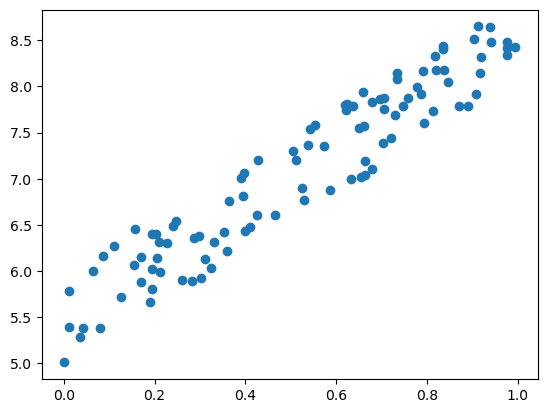

In [37]:
# 学習データ(y軸)を生成
y = 5 + 3 * x + np.random.rand(100,1)

# 生成したデータを表示
plt.scatter(x,y)

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
# fit関数でLinearRegressionの学習を行う
lin_reg = LinearRegression().fit(x,y.ravel())

# y.ravel() : 多次元配列を1次元の配列に変換する
# 例：yy=np.random.rand(100,3)
# yy[0:5]
# yy.ravel()[0:10]

y.shape # 100行1列のデータ

(100, 1)

In [12]:
# 1次元の配列に変換する
y.ravel().shape

(100,)

In [38]:
# intercept_: 切片
# coef_: 傾き

# LinearRegressionの実行結果を表示する
# 学習データ y = 5 + 3 * x + randomで設定した切片、傾きに近い値を得ることができた。
lin_reg.intercept_,lin_reg.coef_

(5.515156370402359, array([3.05287104]))

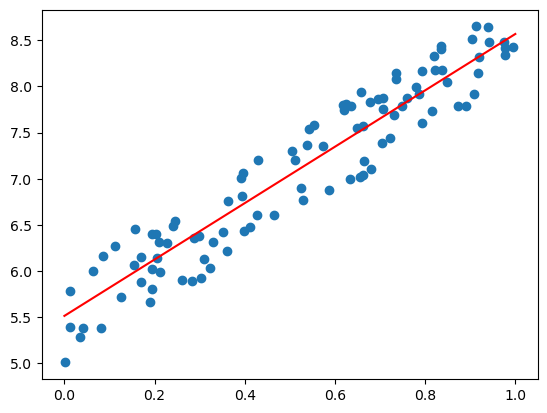

In [39]:
# LinearRegressionで取得した直線を描画　(正規方程式を用いた描画)
x_new = np.array([[0],[1]])
plt.plot(x_new,lin_reg.intercept_ + lin_reg.coef_ * x_new,'red')
plt.scatter(x,y)

In [33]:
# 以下、勾配降下法で傾きと切片を取得する

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

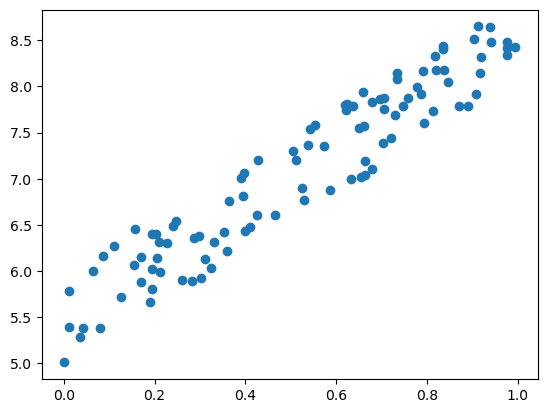

In [40]:
# 学習データを再表示

plt.scatter(x,y)

In [42]:
from sklearn.linear_model import SGDRegressor

# SGDRegressorにより学習
sgd_reg = SGDRegressor(max_iter=100).fit(x,y.ravel())

# intercept_: 切片
# coef_: 傾き
# SGDRegressorの学習結果を表示
sgd_reg.intercept_, sgd_reg.coef_

(array([5.49271773]), array([3.02898012]))

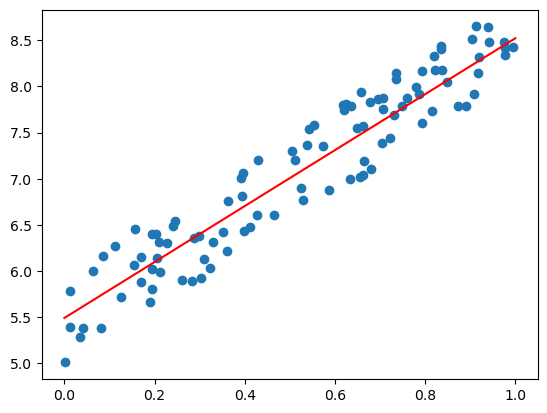

In [46]:
# SGDRegressorで取得した直線を描画　(降下法を用いた描画)
x_new = np.array([[0],[1]])
plt.plot(x_new,sgd_reg.intercept_ + sgd_reg.coef_ * x_new,'red')
plt.scatter(x,y)

In [45]:
# 学習率(eta0)の影響をみてみる　デフォルトは0.01
# 学習率：どの程度の大きさでパラメータの更新を行うかを決めるもの。
# 例えば　eta0=0.0001にしてみる

# SGDRegressorにより学習
sgd_reg_00001 = SGDRegressor(eta0=0.0001,max_iter=100).fit(x,y.ravel())

# SGDRegressorの学習結果を表示
# 学習率が低すぎるので、切片、傾きが想定よりも低く、適切に学習を行えていないことがわかる。
sgd_reg_00001.intercept_,sgd_reg_00001.coef_

C:\Users\kkrsk\miniconda3\envs\ML_Youtube\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(array([0.86763126]), array([0.48174105]))

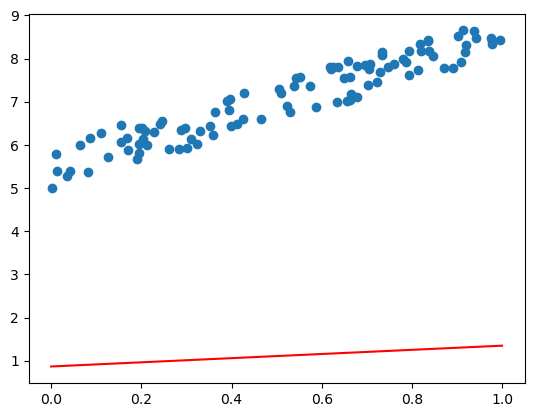

In [47]:
# 不適切な学習率による、SGDRegressorで取得した直線を描画
x_new = np.array([[0],[1]])
plt.plot(x_new,sgd_reg_00001.intercept_ + sgd_reg_00001.coef_ * x_new,'red')
plt.scatter(x,y)